In [1]:
import numpy as np
import pandas as pd

import oracles
import methods
import plot_trajectory_2d
import matplotlib.pyplot as plt

### 2.2 Траектория градиентного спуска на квадратичной функции

Задайте две-три двумерные квадратичные функции с разными числами обусловленности. Запустите на них GD с различными стратегиями выбора шага, изобразите на графиках траектории методов и линии уровня функции. Для рисования линий уровня воспользуйтесь функцией plot_trajectory, а для траекторий методов – функцией plot_levels из файла plot_trajectory_2d.
Постарайтесь ответить на вопрос: как зависит поведение методов от числа обусловленности, от начальной точки, от стратегии выбора длины шага?

In [197]:
def plotting_gd(matrix_A, b, x_0, parameters, fitting_axis=True):
    k_current = np.round(np.linalg.norm(matrix_A) * np.linalg.norm(np.linalg.inv(matrix_A)), 2)
    oracle = oracles.QuadraticOracle(matrix_A, b)
    fig = plt.figure(figsize=(8, 3))
    colors = ['C1', 'C2', 'C3', 'C4', 'C5']
    
    for j, search_params in enumerate(parameters):
        gr = methods.GradientDescent(oracle, x_0, line_search_options=search_params)
        [x_k, history] = gr.run(100000)
        iters = str(len(history['x'])-1)
        if search_params['method'] == 'Constant':
            c = search_params['c']
            label = f'Constant method with c = {c} and {iters} iterations'
        elif search_params['method'] == 'Armijo':
            alpha = search_params['alpha_0']
            c1 = search_params['c1']
            label = f'Armijo method with alpha={alpha}, c1 = {c1} and {iters} iterations'
        else:
            c1 = search_params['c1']
            c2 = search_params['c2']
            label = f'Wolfe method with c1={c1}, c2 = {c2} and {iters} iterations'
        if np.isnan(x_k).all():
            history['x'] = history['x'][:2]
            label = 'Метод не сошелся'
        plot_trajectory_2d.plot_levels(oracle.func)
        plot_trajectory_2d.plot_trajectory(oracle.func, history['x'], fit_axis=fitting_axis,  color=colors[j], label=label)
        plt.xlabel('X coordinate')
        plt.ylabel('Y coordinate')
        plt.title(f'Gradient method for matrix A {matrix_A} with k = {k_current} and x_0 = {x_0}')
        plt.legend()

In [198]:
A1 = np.array([[2., 0.], 
              [0., 2.0]])
A2 = np.array([[1., 0.5], 
              [0.5, 9.]])
b = np.zeros(2)

k1 = np.round(np.linalg.norm(A1) * np.linalg.norm(np.linalg.inv(A1)), 2)
k2 = np.round(np.linalg.norm(A2) * np.linalg.norm(np.linalg.inv(A2)), 2)

print(f'Константы обусловленности матриц А1={k1}, А2={k2}')

Константы обусловленности матриц А1=2.0, А2=9.43


Посмотрим, как ведет себя градиентный метод с постоянным шагом в зависимости от обусловленности матрицы и от значения константы. Рассмотрим 3 вариации метода с хорошо обусловленной матрицей А1 и плохо обусловленной матрицей А2.

In [241]:
x_0 = np.array([5., -10.])
parameters = [{'method': 'Constant', 'c': 0.1},
              {'method': 'Constant', 'c': 0.15},
              {'method': 'Constant', 'c': 0.3}]

#### Постоянный шаг, хорошо обусловленная матрица

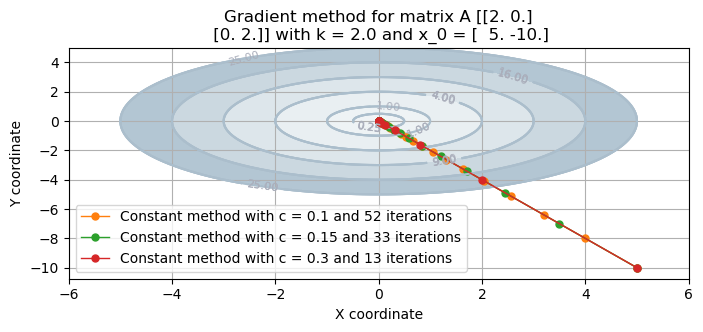

In [244]:
plotting_gd(A1, b, x_0, parameters, fitting_axis=False)

#### Постоянный шаг, плохо обусловленная матрица

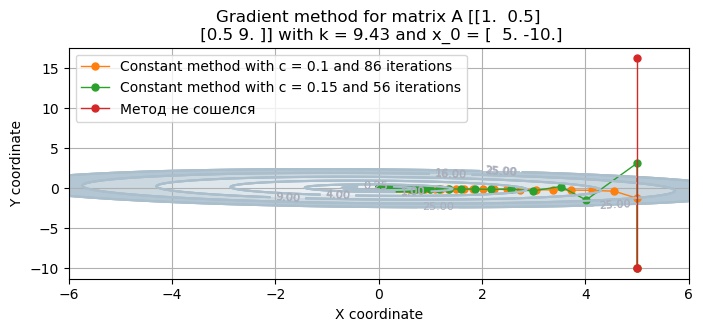

In [246]:
plotting_gd(A2, b, x_0, parameters, fitting_axis=False)

Видно, что для плохо обусловленной матрицы градиентному методу с постоянным шагом нужно большее число итераций, чтобы сойтись. Количество итераций возросло примерно в 2 раза. Сходимость метода зависит от величины константы - при малой константе метод будет долго сходится, при большой может не сойтись.

#### Метод Армихо, хорошо обусловленная матрица

In [271]:
x_0 = np.array([5., -10.])
parameters = [{'method':'Armijo', 'alpha_0':100, 'c1':0.9},
              {'method':'Armijo', 'alpha_0':100, 'c1':0.3},
              {'method':'Armijo', 'alpha_0':1, 'c1':0.3}]

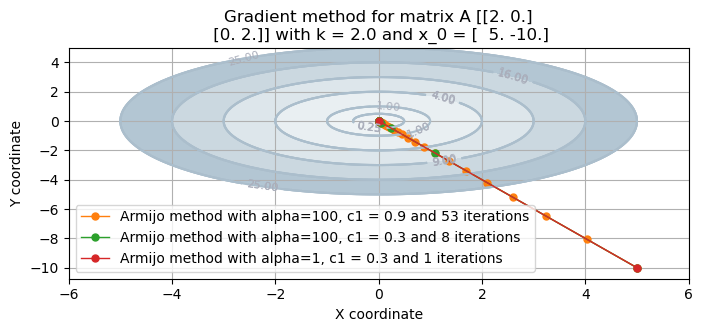

In [272]:
plotting_gd(A1, b, x_0, parameters, fitting_axis=False)

#### Метод Армихо, плохо обусловленная матрица

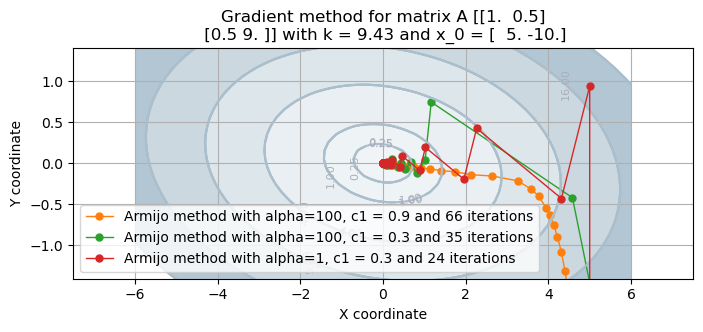

In [273]:
plotting_gd(A2, b, x_0, parameters, fitting_axis=True)

Для плохо обусловленной матрицы число итераций возрастает, но возрастает меньше, чем в методе с постоянным шагом. При большом c1 траектория движения метода плавная, шаги малые. При малом c1 метод сходится быстрее, но траектория движения более хаотичная. При уменьшении alpha метод сходится быстрее. 

#### Метод Вульфа, хорошо обусловленная матрица

In [262]:
x_0 = np.array([5., -10.])
parameters = [{'method':'Wolfe', 'c1':1e-4, 'c2':0.9},
              {'method':'Wolfe', 'c1':1e-4, 'c2':0.6},  
              {'method':'Wolfe', 'c1':1e-4, 'c2':0.1}]

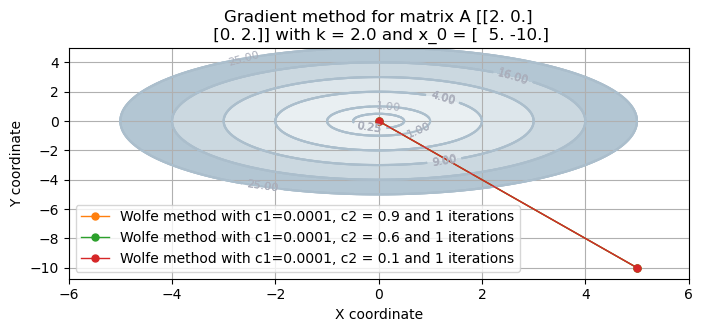

In [263]:
plotting_gd(A1, b, x_0, parameters, fitting_axis=False)

#### Метод Вульфа, плохо обусловленная матрица

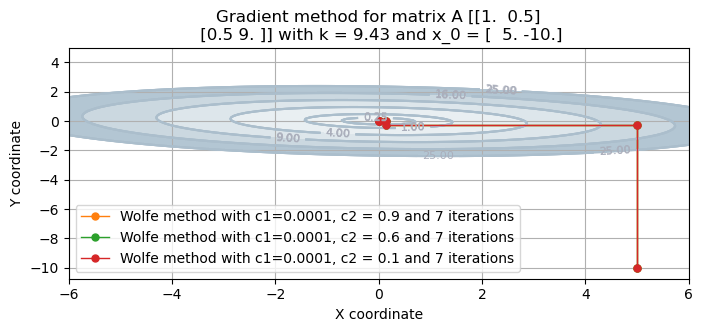

In [264]:
plotting_gd(A2, b, x_0, parameters, fitting_axis=False)

Метод Вульфа одинаково быстро сходится при различных константах с2, траектории движения метода в случаях разной константы с2 совпадают. Плохая обусловленность матрицы влияет на число итераций метода, необходимое для выполнения критерия останова, но метод по прежнему эффективен, хоть траектория и становится более ломаной.

### Посмотрим на работу методов в зависимости от выбора начальной точки: [3.0, -5.0], [10., 1.0], [-5., 0.]

In [275]:
parameters = [{'method': 'Constant', 'c': 0.1},
            {'method':'Armijo', 'alpha_0':100, 'c1':0.9},
             {'method':'Wolfe', 'c1':1e-4, 'c2':0.9}]

### X_0 = [3.0, -5.0]

#### Хорошо Обусловленная матрица

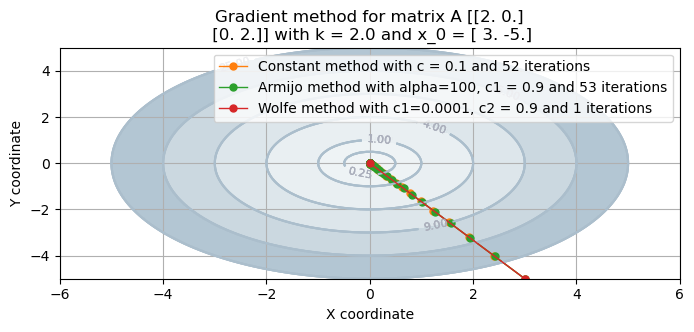

In [276]:
x_1 = np.array([3.0, -5.0])
plotting_gd(A1, b, x_1, parameters, fitting_axis=False)

#### Плохо обусловленная матрица

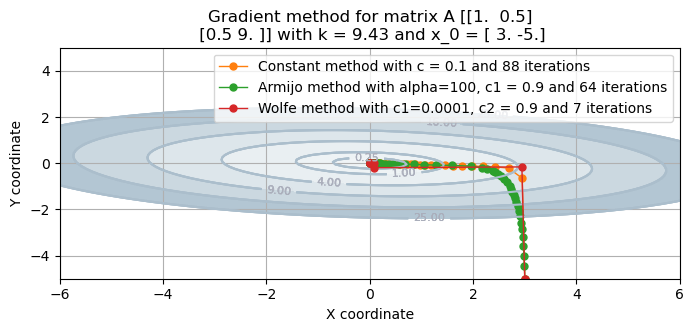

In [278]:
plotting_gd(A2, b, x_1, parameters, fitting_axis=False)

### X_0 = [10., 1.0]

#### Хорошо Обусловленная матрица

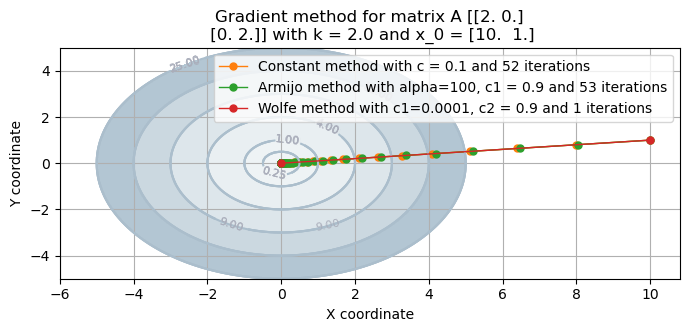

In [288]:
x_2 = np.array([10., 1.0])
plotting_gd(A1, b, x_2, parameters, fitting_axis=False)

#### Плохо Обусловленная матрица

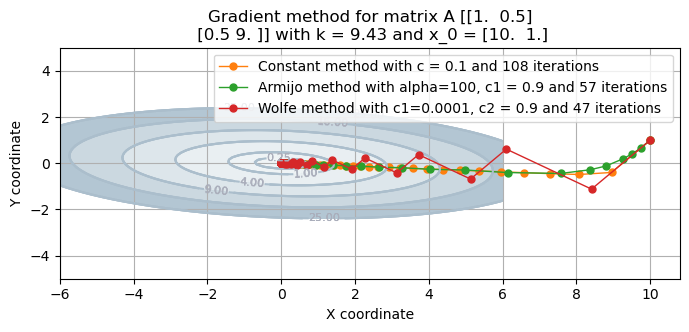

In [289]:
plotting_gd(A2, b, x_2, parameters, fitting_axis=False)

### X_0 = [-5., 0.0]

#### Хорошо обусловленная матрица

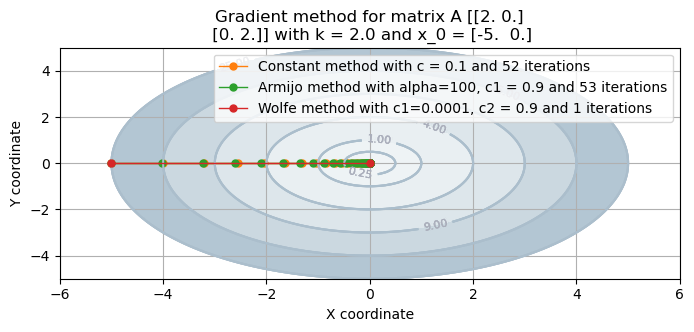

In [290]:
x_3 = np.array([-5., 0.])
plotting_gd(A1, b, x_3, parameters, fitting_axis=False)

#### Плохо обусловленная матрица

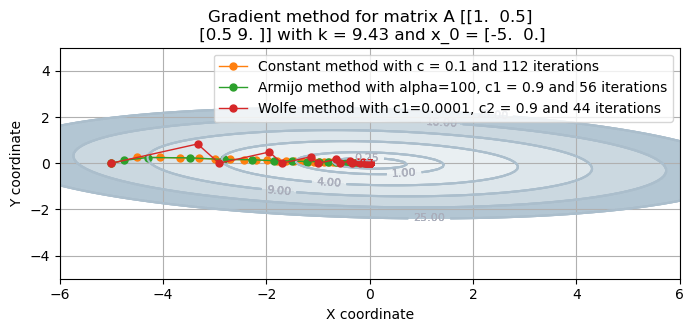

In [291]:
plotting_gd(A2, b, x_3, parameters, fitting_axis=False)

В зависимости от выбора начальной точки число итераций, необходимое для сходимости каждого из методов, может увеличиваться или уменьшаться.

### 2.3 Зависимость числа итераций градиентного спуска от числа обусловленности и размерности пространства (3 балла)

Исследуйте, как зависит число итераций, необходимое GD для сходимости, от

    • Числа обусловленности целевой функции κ;
    • Размерности пространства n.

Для данных параметров n и κ сгенерируйте случайную квадратичную задачу размерности n
с числом обусловленности κ. Это можно сделать, как описано в пункте 1.4. На этой задаче
запустите метод градиентного спуска с вашей любимой стратегией выбора шага и измерьте
число итераций N(n, κ), необходимое для достижения точности ε.

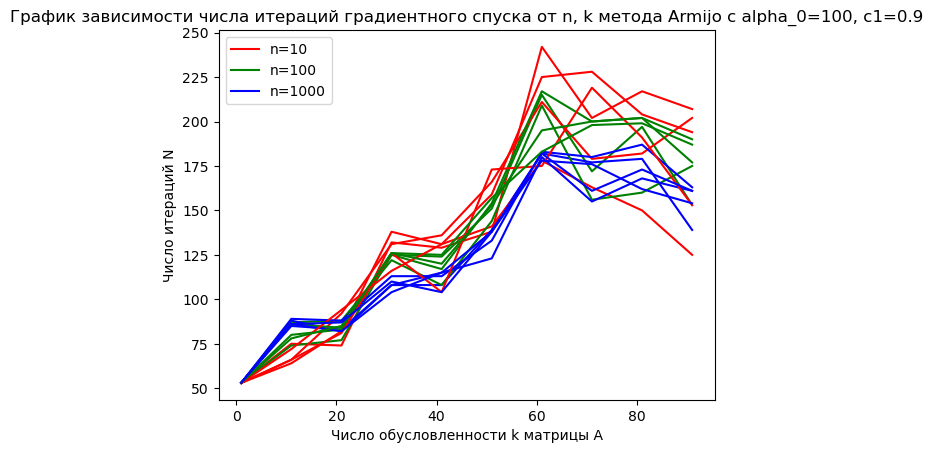

In [43]:
x_0 = np.random.uniform(1, 10, 1000)
search_params = {'method':'Armijo', 'alpha_0':100, 'c1':0.9}
n_lst = [10, 100, 1000]
k_min = 1
k_max = 100
k_arr = np.arange(k_min, k_max, 10)
iterations = [[] for i in range(len(n_lst) * 2)]

for i in range(len(n_lst) * 2): # 6
    for n in n_lst:
        for k in k_arr:
            x_0_loc = x_0[:n].copy()
            b = np.random.rand(n) * k
            diag = np.random.uniform(low=k_min, high=k, size=n)
            diag[1] = 1
            diag[-1] = k
            diag = np.diag(diag)
            A = diag
            oracle = oracles.QuadraticOracle(A, b)
            gr = methods.GradientDescent(oracle, x_0_loc, line_search_options=search_params)
            [x_k, history] = gr.run(10000)
            iters = len(history['time']) - 1
            iterations[i].append(iters)

ax = plt.subplot()
for i in range(len(iterations)-1):
    ax.plot(k_arr, iterations[i][:10], color='r') # n_lst[0]
    ax.plot(k_arr, iterations[i][10:20], color = 'g') # n_lst[1]
    ax.plot(k_arr, iterations[i][20:], color = 'b') # n_lst[2]
plt.xlabel('Число обусловленности k матрицы А')
plt.ylabel('Число итераций N')
plt.title('График зависимости числа итераций градиентного спуска от n, k метода Armijo с alpha_0=100, c1=0.9')
plt.legend(['n=10', 'n=100', 'n=1000']);

По графику зависимости числа итераций градиентного спуска методом Армихо можно заметить, что рост количества итераций данного метода в диапазоне значений k=[1, 60] можно хорошо описать линейной зависимостью. После k = 60 график выходит на некоторое насыщение и число совершаемых итераций либо остается примерно постоянным (для n = 100), либо незначительно уменьшается (n=10, n=1000). Также можно заметить, что разброс значений числа итераций при увеличении k увеличивается.
Также по полученному графику видно, что при увеличении размерности n, число итераций при определенном k уменьшается.